In [6]:
%load_ext autoreload 
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
import os
import numpy as np
import pandas as pd
from datetime import datetime

pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 100)



In [8]:
import sqlite3
import pandas as pd
import os
from pathlib import Path


def create_connection(db_path):
    """Cria a conexão com o banco de dados SQLite."""
    connection = None
    try:
        connection = sqlite3.connect(db_path)

        print("Conexão SQLite estabelecida.")
    except sqlite3.Error as e:
        print(f"Erro ao conectar ao SQLite: {e}")
    return connection

BASE_DIR = os.path.dirname(os.path.dirname(os.path.dirname(os.path.abspath('__file__'))))
DATA_DIR = os.path.join(BASE_DIR, 'database')
FT_DIR = os.path.join(BASE_DIR, 'pred_soccer', 'feature_eng', 'data')

conn = create_connection(db_path=Path(os.path.join(DATA_DIR, "soccer_data.db")))
country = "Brazil"
query = "SELECT * FROM soccer_data WHERE country = ?"

df_init = pd.read_sql_query(query, conn, params=(country,))

conn.close()


Conexão SQLite estabelecida.


In [9]:
df_init['match_name'] = df_init['home_team']+' - '+df_init['away_team']

df_init['season'] = df_init['season'].astype(int)
df_init['datetime'] = pd.to_datetime(df_init['datetime'])

In [10]:
df = df_init.copy()
df.head()

,id,country,league,season,home_team,away_team,home_score,away_score,result,psch,pscd,psca,maxch,maxcd,maxca,avgch,avgcd,avgca,bfech,bfecd,datetime,hash,last_updated,match_name
0,5415,Brazil,Serie A,2012,Palmeiras,Portuguesa,1,1,D,1.75,3.86,5.25,1.76,3.87,5.31,1.69,3.50,4.90,NaN,NaN,2012-05-19 22:30:00,10444097902145517897,2024-12-18 22:32:46,Palmeiras - Portuguesa
1,5416,Brazil,Serie A,2012,Sport Recife,Flamengo RJ,1,1,D,2.83,3.39,2.68,2.83,3.42,2.70,2.59,3.23,2.58,NaN,NaN,2012-05-19 22:30:00,7876314183501917566,2024-12-18 22:32:46,Sport Recife - Flamengo RJ
2,5417,Brazil,Serie A,2012,Figueirense,Nautico,2,1,H,1.60,4.04,6.72,1.67,4.05,7.22,1.59,3.67,5.64,NaN,NaN,2012-05-20 01:00:00,9296066046964045682,2024-12-18 22:32:46,Figueirense - Nautico
3,5418,Brazil,Serie A,2012,Botafogo RJ,Sao Paulo,4,2,H,2.49,3.35,3.15,2.49,3.39,3.15,2.35,3.26,2.84,NaN,NaN,2012-05-20 20:00:00,3618841616446699339,2024-12-18 22:32:46,Botafogo RJ - Sao Paulo
4,5419,Brazil,Serie A,2012,Corinthians,Fluminense,0,1,A,1.96,3.53,4.41,1.96,3.53,4.41,1.89,3.33,3.89,NaN,NaN,2012-05-20 20:00:00,11994628649421207242,2024-12-18 22:32:46,Corinthians - Fluminense


In [11]:
# Selecionando colunas mais relevantes


df = df[["season","datetime", "home_team",  
        "away_team",
        "home_score", 'away_score',
        "result"
        #"estadio","arbitro","publico","publico_max","rodada", 
        ]]

In [12]:
df.isna().sum()

season        0
datetime      0
home_team     0
away_team     0
home_score    0
away_score    0
result        0
dtype: int64

In [13]:
#df['estadio'].fillna(value='Estádio Sem Nome', inplace=True)
#df['arbitro'].fillna('Sem Nome', inplace=True)
#df['publico'].fillna(df['publico'].median(), inplace=True)
#df['publico_max'].fillna(df['publico_max'].median(), inplace=True)
#df.dropna(subset=['gols_mandante', 'gols_visitante'], inplace=True)

In [14]:
df.shape

(4939, 7)

In [15]:
df.isna().sum()

season        0
datetime      0
home_team     0
away_team     0
home_score    0
away_score    0
result        0
dtype: int64

In [16]:
df['datetime'].min(), df['datetime'].max()

(Timestamp('2012-05-19 22:30:00'), Timestamp('2024-12-08 19:00:00'))

In [17]:
# Definindo variavel yapi-futebol/feature_eng/feature-eng.ipynb
#{'DRAW':0, 'AWAY_TEAM':1, 'HOME_TEAM':2}
#df['winner'] = np.where(df['home_score'] > df['away_score'], 2, np.where(df['home_score'] < df['away_score'], 1, 0))

In [18]:
df[df['season']=='2024'].head()

,season,datetime,home_team,away_team,home_score,away_score,result


In [19]:
# Ajustando o tipo de colunas
to_int = ['home_score', 'away_score']

for col in to_int:
    df[col] = df[col].astype(int)



In [20]:
df['home_team'].unique()

array(['Palmeiras', 'Sport Recife', 'Figueirense', 'Botafogo RJ',
       'Corinthians', 'Internacional', 'Ponte Preta', 'Bahia', 'Cruzeiro',
       'Vasco', 'Atletico GO', 'Flamengo RJ', 'Portuguesa', 'Nautico',
       'Atletico-MG', 'Coritiba', 'Santos', 'Sao Paulo', 'Fluminense',
       'Gremio', 'Vitoria', 'Criciuma', 'Athletico-PR', 'Goias',
       'Chapecoense-SC', 'Avai', 'Joinville', 'Santa Cruz', 'America MG',
       'Parana', 'Ceara', 'CSA', 'Fortaleza', 'Bragantino', 'Cuiaba',
       'Juventude'], dtype=object)

In [21]:
# Criando one hotencode para os times
# TODO: O que é melhor?
    # Criar OneHotEncoder para cada time ou um para o matchTime?

from sklearn.preprocessing import LabelEncoder

# Criar LabelEncoder para home_team e away_team
label_encoder = LabelEncoder()
df['home_team_encoder'] = label_encoder.fit_transform(df['home_team'])
df['away_team_encoder'] = label_encoder.fit_transform(df['away_team'])


In [22]:
#df.to_csv(os.path.join(FT_DIR, 'ft_df_basic.csv'), index = False)


----

Criando pontuação de desempenho para cada partida

In [23]:
df.head()

,season,datetime,home_team,away_team,home_score,away_score,result,home_team_encoder,away_team_encoder
0,2012,2012-05-19 22:30:00,Palmeiras,Portuguesa,1,1,D,26,29
1,2012,2012-05-19 22:30:00,Sport Recife,Flamengo RJ,1,1,D,33,17
2,2012,2012-05-20 01:00:00,Figueirense,Nautico,2,1,H,16,25
3,2012,2012-05-20 20:00:00,Botafogo RJ,Sao Paulo,4,2,H,6,32
4,2012,2012-05-20 20:00:00,Corinthians,Fluminense,0,1,A,11,18


In [24]:
dict_result = {'DRAW':0, 'AWAY_WIN':1, 'HOME_WIN':2}
df['winner'] = np.where(df['home_score'] > df['away_score'], dict_result["HOME_WIN"], np.where(df['home_score'] < df['away_score'], dict_result['AWAY_WIN'], dict_result['DRAW']))

In [25]:
# Pontos do time da casa feitos em cada partida
df['h_match_points'] = np.where(df['winner'] == dict_result['HOME_WIN'], 3, 
                                np.where(df['winner']==dict_result['DRAW'], 1, 0))

# Pontos do time visitante feitos em cada partida
df['a_match_points'] = np.where(df['winner'] == dict_result['AWAY_WIN'], 3, 
                                np.where(df['winner']==dict_result['DRAW'], 1, 0))


In [26]:
df.head(2)

,season,datetime,home_team,away_team,home_score,away_score,result,home_team_encoder,away_team_encoder,winner,h_match_points,a_match_points
0,2012,2012-05-19 22:30:00,Palmeiras,Portuguesa,1,1,D,26,29,0,1,1
1,2012,2012-05-19 22:30:00,Sport Recife,Flamengo RJ,1,1,D,33,17,0,1,1


In [27]:
df['match_name'] = df['home_team'] + ' - ' + df['away_team']
df['datetime'] = pd.to_datetime(df['datetime'])

In [28]:
cols_order = ['season', 'datetime', 
            'match_name', 
            'home_team', 
            'away_team', 
            'home_team_encoder', 'away_team_encoder',
            'winner', 'home_score', 'away_score',
                'h_match_points', 'a_match_points']

df = df[cols_order]
df.head()

,season,datetime,match_name,home_team,away_team,home_team_encoder,away_team_encoder,winner,home_score,away_score,h_match_points,a_match_points
0,2012,2012-05-19 22:30:00,Palmeiras - Portuguesa,Palmeiras,Portuguesa,26,29,0,1,1,1,1
1,2012,2012-05-19 22:30:00,Sport Recife - Flamengo RJ,Sport Recife,Flamengo RJ,33,17,0,1,1,1,1
2,2012,2012-05-20 01:00:00,Figueirense - Nautico,Figueirense,Nautico,16,25,2,2,1,3,0
3,2012,2012-05-20 20:00:00,Botafogo RJ - Sao Paulo,Botafogo RJ,Sao Paulo,6,32,2,4,2,3,0
4,2012,2012-05-20 20:00:00,Corinthians - Fluminense,Corinthians,Fluminense,11,18,1,0,1,0,3


In [ ]:
import numpy as np

np.reshape

<function numpy.array>

--- 

Refatoração já

In [29]:
from match_analysis import get_storage_ranks, create_main_cols, get_match_stats_optimized

---

In [30]:
cols = ['_rank', '_ls_rank', '_days_ls_match', '_points',
 '_l_points', '_l_wavg_points', '_goals', '_l_goals', '_l_wavg_goals', '_goals_sf', '_l_goals_sf', '_l_wavg_goals_sf','_wins', '_draws', '_losses', '_win_streak', '_loss_streak', '_draw_streak']

ht_cols = ['ht' + col for col in cols]
at_cols = ['at' + col for col in cols]

In [31]:
len(at_cols)

18

In [32]:
#gets main cols for home and away team
df_storage_ranks = get_storage_ranks(df)
df[ht_cols] = pd.DataFrame(
    df.apply(
        lambda x: create_main_cols(x, x.home_team, df, df_storage_ranks), axis = 1).to_list(), index = df.index)

df[at_cols] = pd.DataFrame(
    df.apply(
        lambda x: create_main_cols(x, x.away_team, df, df_storage_ranks), axis = 1).to_list(), index = df.index)        

#result between last game of the teams
#df['ls_winner'] = df.apply(lambda x: get_ls_winner(x), axis = 1)

In [33]:
# team_rank = rank_df[rank_df.team == team].min()['rank']

In [34]:
### Exemplo 
#df_storage_ranks = get_storage_ranks(df)
#x = df.iloc[2]
#team = x.home_team

#team_rank = get_rank(x, team, 0, df_storage_ranks=df_storage_ranks)
#ls_team_rank = get_rank(x, team, 1, df_storage_ranks=df_storage_ranks)



In [35]:
#x = df.iloc[10]
#result = create_main_cols(x, x.home_team, df)
#dict_results = {ht_col:res for res, ht_col in zip(result, ht_cols)}
#dict_results['home_team'] = x.home_team
#
#pd.DataFrame([dict_results])

---
Predição


In [40]:
def feature_eng(df_pred, df_all):
    df_pred = df_pred.copy()
    cols = ['_rank', '_ls_rank', '_days_ls_match', '_points',
    '_l_points', '_l_wavg_points', '_goals', '_l_goals', '_l_wavg_goals', '_goals_sf', '_l_goals_sf', '_l_wavg_goals_sf','_wins', '_draws', '_losses', '_win_streak', '_loss_streak', '_draw_streak']

    ht_cols = ['ht' + col for col in cols]
    at_cols = ['at' + col for col in cols]

    #gets main cols for home and away team
    #gets main cols for home and away team
    df_storage_ranks = get_storage_ranks(df_all)

    df_pred[ht_cols] = pd.DataFrame(
        df_pred.apply(
            lambda x: create_main_cols(x, x.home_team, df_pred, df_storage_ranks), axis = 1).to_list(), index = df_pred.index)

    df_pred[at_cols] = pd.DataFrame(
        df_pred.apply(
            lambda x: create_main_cols(x, x.away_team, df_pred, df_storage_ranks), axis = 1).to_list(), index = df_pred.index) 

    return df_pred  

In [37]:
df.iloc[:5]['home_team'].tolist()

for idx, row in df.iloc[-5:].iterrows():
    print(f"{row['datetime']} - {row['home_team']} vs {row['away_team']}")

2024-12-08 19:00:00 - Flamengo RJ vs Vitoria
2024-12-08 19:00:00 - Fortaleza vs Internacional
2024-12-08 19:00:00 - Gremio vs Corinthians
2024-12-08 19:00:00 - Juventude vs Cruzeiro
2024-12-08 19:00:00 - Palmeiras vs Fluminense


In [38]:
df_pred = df_init.iloc[-5:].copy()
df_pred.drop(columns=["home_score","away_score","result"], inplace=True)
df_pred.head()

,id,country,league,season,home_team,away_team,psch,pscd,psca,maxch,maxcd,maxca,avgch,avgcd,avgca,bfech,bfecd,datetime,hash,last_updated,match_name
4934,10349,Brazil,Serie A,2024,Flamengo RJ,Vitoria,1.38,5.20,7.93,1.40,5.30,8.25,1.37,5.02,7.66,1.41,5.40,2024-12-08 19:00:00,13090211533677099395,2024-12-18 22:32:46,Flamengo RJ - Vitoria
4935,10350,Brazil,Serie A,2024,Fortaleza,Internacional,2.62,3.24,2.88,2.65,3.25,2.90,2.59,3.18,2.80,2.70,3.35,2024-12-08 19:00:00,780931226434892506,2024-12-18 22:32:46,Fortaleza - Internacional
4936,10351,Brazil,Serie A,2024,Gremio,Corinthians,2.74,3.35,2.66,2.77,3.46,2.74,2.67,3.34,2.61,2.86,3.55,2024-12-08 19:00:00,14826763340144835851,2024-12-18 22:32:46,Gremio - Corinthians
4937,10352,Brazil,Serie A,2024,Juventude,Cruzeiro,2.13,3.42,3.59,2.21,3.47,3.59,2.13,3.37,3.44,2.20,3.55,2024-12-08 19:00:00,18046607925159384753,2024-12-18 22:32:46,Juventude - Cruzeiro
4938,10353,Brazil,Serie A,2024,Palmeiras,Fluminense,1.47,4.56,6.85,1.51,4.60,7.10,1.46,4.41,6.74,1.48,4.90,2024-12-08 19:00:00,14028844859822210561,2024-12-18 22:32:46,Palmeiras - Fluminense


In [41]:
df_pred = feature_eng(df_pred, df.iloc[:-5])

In [42]:
df_pred

,id,country,league,season,home_team,away_team,psch,pscd,psca,maxch,maxcd,maxca,avgch,avgcd,avgca,bfech,bfecd,datetime,hash,last_updated,match_name,ht_rank,ht_ls_rank,ht_days_ls_match,ht_points,ht_l_points,ht_l_wavg_points,ht_goals,ht_l_goals,ht_l_wavg_goals,ht_goals_sf,ht_l_goals_sf,ht_l_wavg_goals_sf,ht_wins,ht_draws,ht_losses,ht_win_streak,ht_loss_streak,ht_draw_streak,at_rank,at_ls_rank,at_days_ls_match,at_points,at_l_points,at_l_wavg_points,at_goals,at_l_goals,at_l_wavg_goals,at_goals_sf,at_l_goals_sf,at_l_wavg_goals_sf,at_wins,at_draws,at_losses,at_win_streak,at_loss_streak,at_draw_streak
4934,10349,Brazil,Serie A,2024,Flamengo RJ,Vitoria,1.38,5.20,7.93,1.40,5.30,8.25,1.37,5.02,7.66,1.41,5.40,2024-12-08 19:00:00,13090211533677099395,2024-12-18 22:32:46,Flamengo RJ - Vitoria,3,4.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4935,10350,Brazil,Serie A,2024,Fortaleza,Internacional,2.62,3.24,2.88,2.65,3.25,2.90,2.59,3.18,2.80,2.70,3.35,2024-12-08 19:00:00,780931226434892506,2024-12-18 22:32:46,Fortaleza - Internacional,5,10.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,9.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4936,10351,Brazil,Serie A,2024,Gremio,Corinthians,2.74,3.35,2.66,2.77,3.46,2.74,2.67,3.34,2.61,2.86,3.55,2024-12-08 19:00:00,14826763340144835851,2024-12-18 22:32:46,Gremio - Corinthians,13,2.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,13.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4937,10352,Brazil,Serie A,2024,Juventude,Cruzeiro,2.13,3.42,3.59,2.21,3.47,3.59,2.13,3.37,3.44,2.20,3.55,2024-12-08 19:00:00,18046607925159384753,2024-12-18 22:32:46,Juventude - Cruzeiro,14,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,14.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4938,10353,Brazil,Serie A,2024,Palmeiras,Fluminense,1.47,4.56,6.85,1.51,4.60,7.10,1.46,4.41,6.74,1.48,4.90,2024-12-08 19:00:00,14028844859822210561,2024-12-18 22:32:46,Palmeiras - Fluminense,2,1.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16,8.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df

---

In [ ]:
df[df['season']==2020].head()

,season,datetime,match_name,home_team,away_team,home_team_encoder,away_team_encoder,winner,home_score,away_score,h_match_points,a_match_points,ht_rank,ht_ls_rank,ht_days_ls_match,ht_points,ht_l_points,ht_l_wavg_points,ht_goals,ht_l_goals,ht_l_wavg_goals,ht_goals_sf,ht_l_goals_sf,ht_l_wavg_goals_sf,ht_wins,ht_draws,ht_losses,ht_win_streak,ht_loss_streak,ht_draw_streak,at_rank,at_ls_rank,at_days_ls_match,at_points,at_l_points,at_l_wavg_points,at_goals,at_l_goals,at_l_wavg_goals,at_goals_sf,at_l_goals_sf,at_l_wavg_goals_sf,at_wins,at_draws,at_losses,at_win_streak,at_loss_streak,at_draw_streak,ls_winner
3039,2020,2020-08-08 23:00:00,Fortaleza - Athletico-PR,Fortaleza,Athletico-PR,19,1,1,0,2,0,3,16,9.0,NaN,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0,0,0,0,0,10,5.0,NaN,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0,0,0,0,0,AWAY_TEAM
3040,2020,2020-08-08 23:30:00,Coritiba - Internacional,Coritiba,Internacional,12,22,1,0,1,0,3,19,NaN,NaN,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0,0,0,0,0,2,7.0,NaN,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0,0,0,0,0,AWAY_TEAM
3041,2020,2020-08-09 01:00:00,Sport Recife - Ceara,Sport Recife,Ceara,33,9,2,3,2,3,0,15,NaN,NaN,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0,0,0,0,0,11,16.0,NaN,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0,0,0,0,0,AWAY_TEAM
3042,2020,2020-08-09 20:00:00,Flamengo RJ - Atletico-MG,Flamengo RJ,Atletico-MG,17,3,1,0,1,0,3,1,1.0,NaN,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0,0,0,0,0,3,13.0,NaN,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0,0,0,0,0,AWAY_TEAM
3043,2020,2020-08-09 20:00:00,Santos - Bragantino,Santos,Bragantino,31,7,0,1,1,1,1,8,3.0,NaN,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0,0,0,0,0,9,NaN,NaN,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0,0,0,0,0,None


<Axes: >

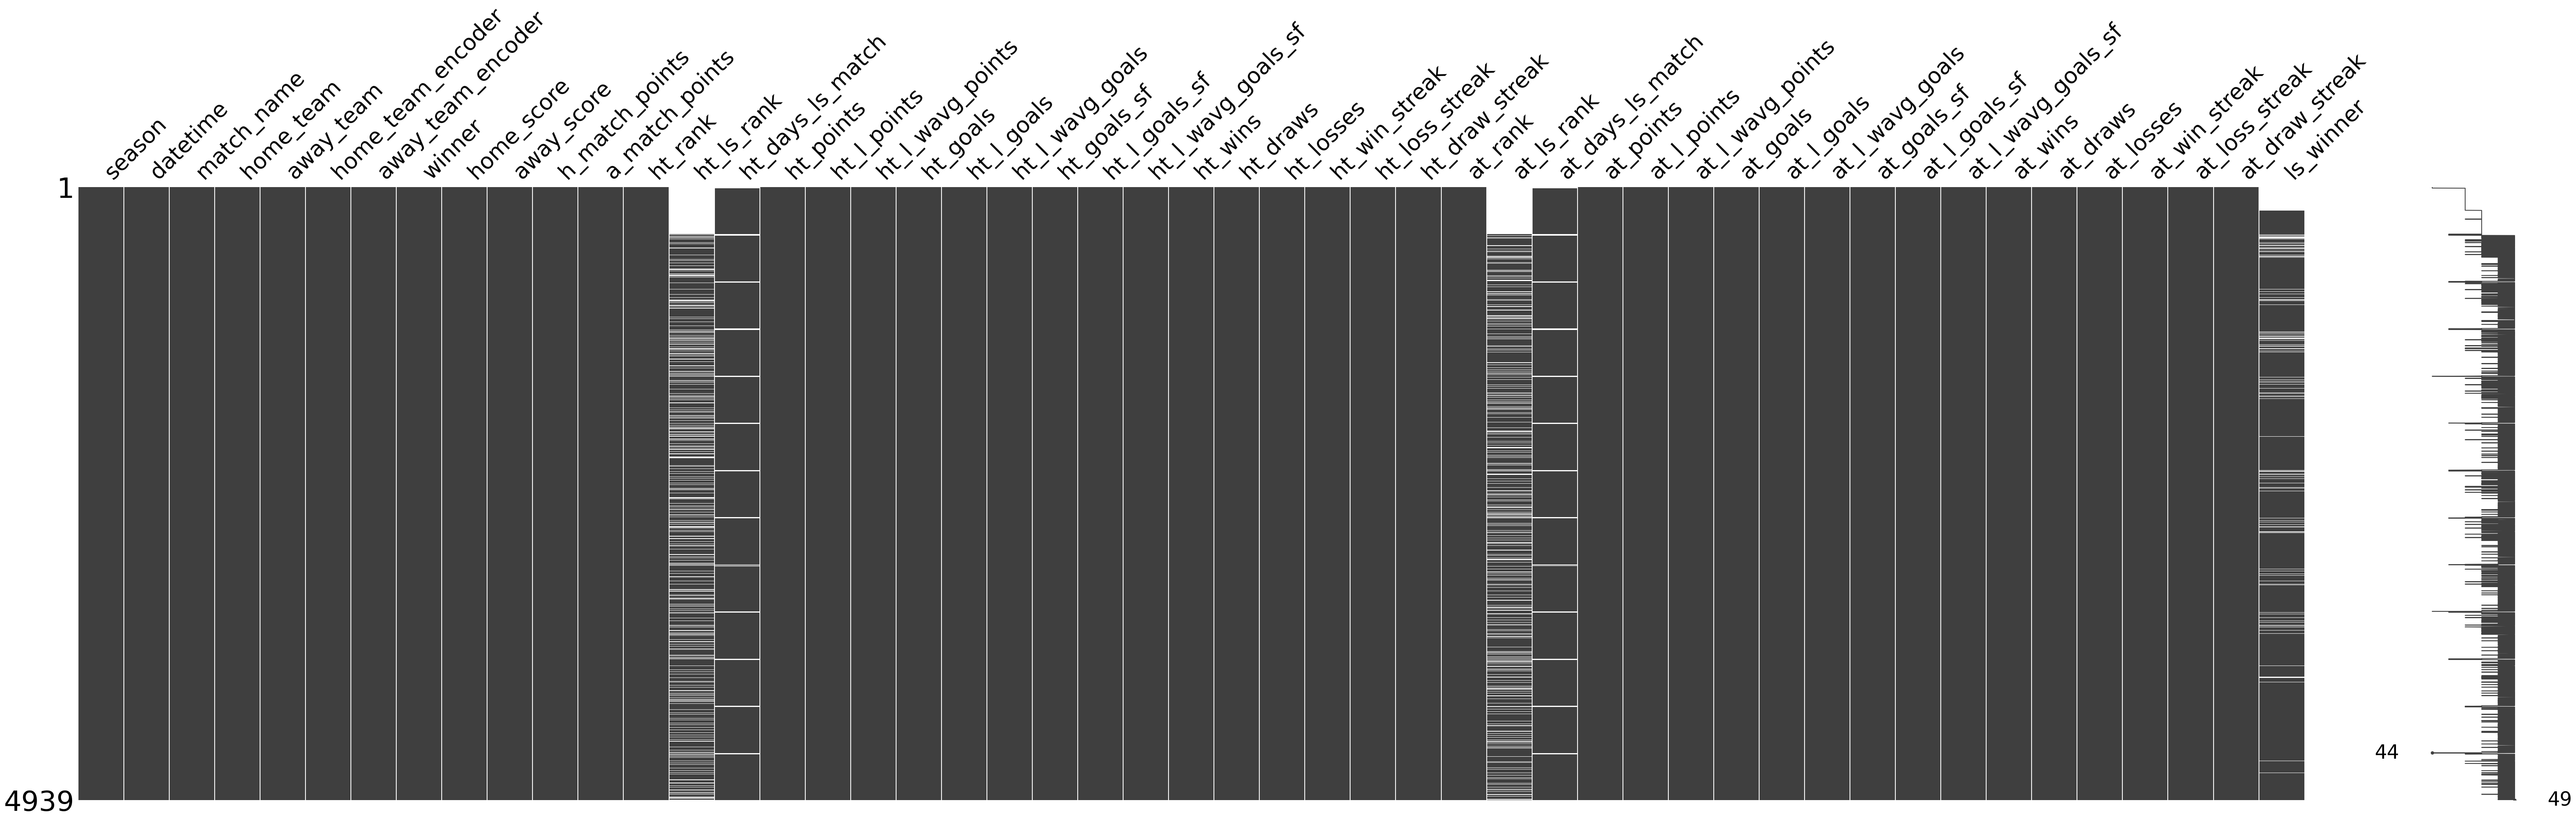

In [ ]:
import missingno as msno

df.isna().sum()

msno.matrix(df, figsize=(80, 20), fontsize=40)

In [ ]:
#dropping columns one wouldn't have before an actual match
cols_to_drop = ['match_name', # 'season', 
                'datetime', 
                'home_team', 'away_team', 
                'home_score', 'away_score',
                'h_match_points', 'a_match_points']

df.drop(columns=cols_to_drop, inplace = True)

#filling NAs
df.fillna(-33, inplace = True)

#turning the target variable into integers
#df['winner'] = np.where(df.winner == 'HOME_TEAM', 2, np.where(df.winner == 'AWAY_TEAM', 1, 0))

#turning categorical into dummy vars
df_dum = pd.get_dummies(df)

# TODO:
# Se fazer um OneHotEncoder para a coluna de Times?

In [ ]:
df.head()

,season,home_team_encoder,away_team_encoder,winner,ht_rank,ht_ls_rank,ht_days_ls_match,ht_points,ht_l_points,ht_l_wavg_points,ht_goals,ht_l_goals,ht_l_wavg_goals,ht_goals_sf,ht_l_goals_sf,ht_l_wavg_goals_sf,ht_wins,ht_draws,ht_losses,ht_win_streak,ht_loss_streak,ht_draw_streak,at_rank,at_ls_rank,at_days_ls_match,at_points,at_l_points,at_l_wavg_points,at_goals,at_l_goals,at_l_wavg_goals,at_goals_sf,at_l_goals_sf,at_l_wavg_goals_sf,at_wins,at_draws,at_losses,at_win_streak,at_loss_streak,at_draw_streak,ls_winner
0,2012,26,29,0,18,-33.0,-33.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0,0,0,0,0,16,-33.0,-33.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0,0,0,0,0,-33
1,2012,33,17,0,17,-33.0,-33.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0,0,0,0,0,11,-33.0,-33.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0,0,0,0,0,-33
2,2012,16,25,2,20,-33.0,-33.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0,0,0,0,0,12,-33.0,-33.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0,0,0,0,0,-33
3,2012,6,32,2,7,-33.0,-33.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0,0,0,0,0,4,-33.0,-33.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0,0,0,0,0,-33
4,2012,11,18,1,6,-33.0,-33.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0,0,0,0,0,1,-33.0,-33.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0,0,0,0,0,-33


In [ ]:
df.to_csv(os.path.join(FT_DIR, 'ft_df.csv'), index = False)


In [ ]:
x = df.iloc[2660].copy()
team = 'Palmeiras'

(
x['total_points'], 
x['total_l_points'], 
x['total_l_w_avg_points'], 
x['total_goals'], 
x['total_l_goals'], 
x['total_l_w_avg_goals'], 
x['total_goals_sf'], 
x['total_l_goals_sf'], 
x['total_l_w_avg_goals_sf'], 
x['total_wins'], 
x['total_draws'], 
x['total_losses'], 
x['win_streak'], 
x['loss_streak'],
x['draw_streak']
) = get_match_stats(x, team)

AttributeError: 'DataFrame' object has no attribute 'home_team'